In [213]:
from sklearn.model_selection import train_test_split

In [215]:
df = pd.read_csv('data/raw/heart_cleveland_upload.csv')
df_train, df_oos = train_test_split(df, stratify=df['condition'], test_size=0.25, random_state=42)
df.shape, df_train.shape, df_oos.shape

((297, 14), (222, 14), (75, 14))

In [217]:
df_train.to_csv('data/raw/train.csv', index=False)
df_oos.to_csv('data/raw/oos.csv', index=False)

# EDA

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.float_format','{:,.5f}'.format)
pd.set_option('display.max_columns', None)
from IPython import display

In [187]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
# #графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 
plt.rcParams['font.family'] = 'DejaVu Serif'
# plt.rcParams['lines.linewidth'] = 2
# plt.rcParams['lines.markersize'] = 12
# plt.rcParams['xtick.labelsize'] = 24
# plt.rcParams['ytick.labelsize'] = 24
# plt.rcParams['legend.fontsize'] = 24
# plt.rcParams['axes.titlesize'] = 36
# plt.rcParams['axes.labelsize'] = 24
plt.rcParams['figure.figsize'] = [10, 4]
# ### Сохранение изображения ###
plt.savefig('1.svg') # Поддерживаемые форматы: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
sns.set_style('whitegrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=12)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=11)    # fontsize of the tick labels
plt.rc('ytick', labelsize=11)    # fontsize of the tick labels
plt.rc('legend', fontsize=11)    # legend fontsize
plt.rc('font', size=11)          # controls default text sizes

<Figure size 720x288 with 0 Axes>

In [188]:
df = pd.read_csv('data/raw/heart_cleveland_upload.csv')

In [189]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.10000,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.80000,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.60000,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.40000,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.80000,1,0,0,0


In [190]:
df.condition.value_counts(normalize=True)

0   0.53872
1   0.46128
Name: condition, dtype: float64

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [192]:
df.duplicated().sum()

0

In [193]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.00000,297.00000,297.00000,297.00000,297.00000,297.00000,297.00000,297.00000,297.00000,297.00000,297.00000,297.00000,297.00000,297.00000
mean,54.54209,0.67677,2.15825,131.69360,247.35017,0.14478,0.99663,149.59933,0.32660,1.05556,0.60269,0.67677,0.83502,0.46128
std,9.04974,0.46850,0.96486,17.76281,51.99758,0.35247,0.99491,22.94156,0.46976,1.16612,0.61819,0.93896,0.95669,0.49934
min,29.00000,0.00000,0.00000,94.00000,126.00000,0.00000,0.00000,71.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,48.00000,0.00000,2.00000,120.00000,211.00000,0.00000,0.00000,133.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,56.00000,1.00000,2.00000,130.00000,243.00000,0.00000,1.00000,153.00000,0.00000,0.80000,1.00000,0.00000,0.00000,0.00000
75%,61.00000,1.00000,3.00000,140.00000,276.00000,0.00000,2.00000,166.00000,1.00000,1.60000,1.00000,1.00000,2.00000,1.00000
max,77.00000,1.00000,3.00000,200.00000,564.00000,1.00000,2.00000,202.00000,1.00000,6.20000,2.00000,3.00000,2.00000,1.00000


Text(0.5, 1.0, 'Correlation Matrix')

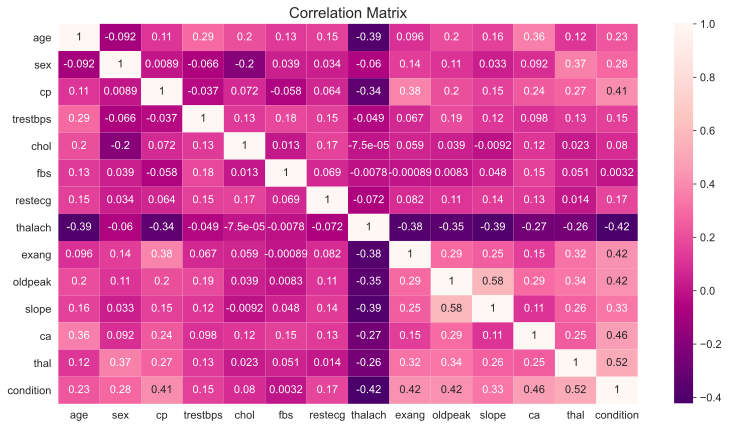

In [198]:
corr = df.corr()
f, ax = plt.subplots(figsize=(13, 7))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, cmap='RdPu_r')
ax.set_title('Correlation Matrix')

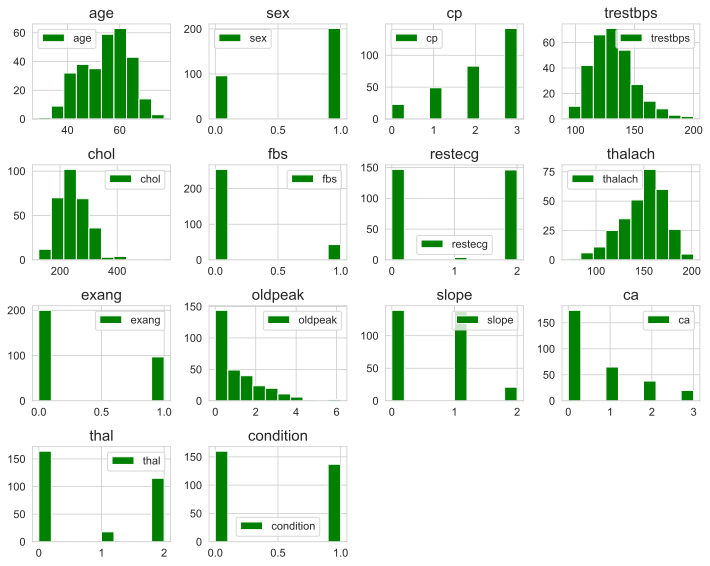

In [196]:
plt.figure(figsize=(10, 8))
for i, col in enumerate(df.columns.to_list()):
    plt.subplot(4, 4, i + 1)
    plt.hist(df[col], label=col, color='green')
    plt.legend()
    plt.title(col)
    plt.tight_layout()

min


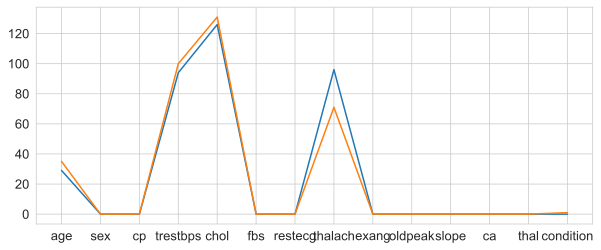

mean


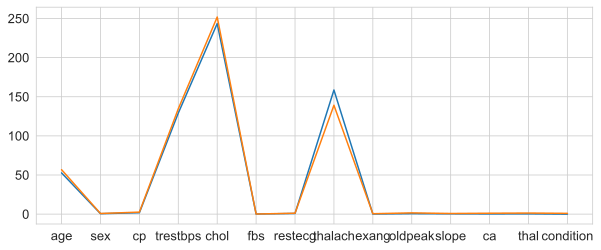

max


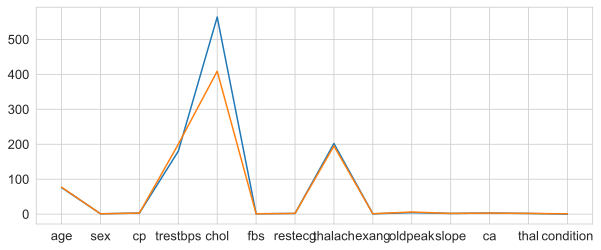

In [177]:
for stat in ['min', 'mean', 'max']:
    print(stat)
    plt.plot(df[df['condition']==0].describe().loc[stat])
    plt.plot(df[df['condition']==1].describe().loc[stat])
    
    #display plot
    plt.show()

In [130]:
{0: 'Female', 1: 'Male'}

{0: 'Female', 1: 'Male'}

In [129]:
list(df[df['condition']==1].sex.value_counts().index)

[1, 0]

<BarContainer object of 2 artists>

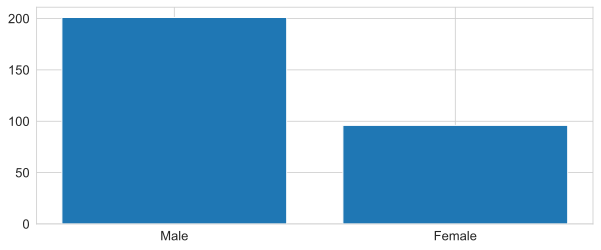

In [128]:
plt.bar(x=['Male', 'Female'], height=df.sex.value_counts().values)

<BarContainer object of 2 artists>

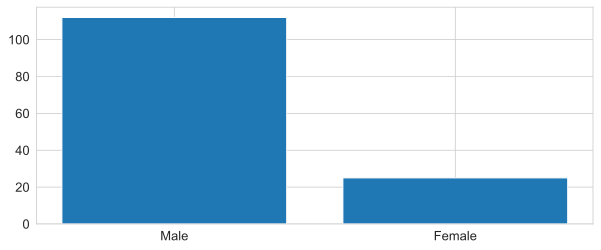

In [131]:
plt.bar(x=['Male', 'Female'], height=df[df['condition']==1].sex.value_counts().values)

<BarContainer object of 2 artists>

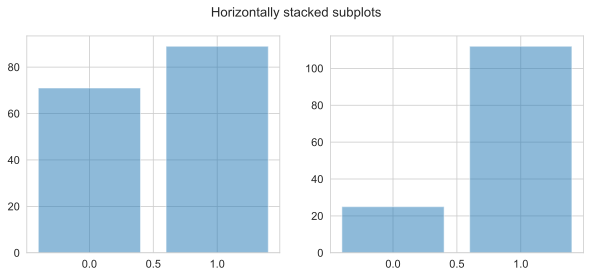

In [204]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.figsize = (15, 4)
fig.suptitle('Horizontally stacked subplots')
ax1.bar(x=df[df['condition']==0].sex.value_counts().index, height=df[df['condition']==0].sex.value_counts().values, alpha=0.5, label='condition=0')
ax2.bar(x=df[df['condition']==1].sex.value_counts().index, height=df[df['condition']==1].sex.value_counts().values, alpha=0.5, label='condition=0')

(array([10., 42., 66., 71., 54., 27., 14.,  8.,  3.,  2.]),
 array([ 94. , 104.6, 115.2, 125.8, 136.4, 147. , 157.6, 168.2, 178.8,
        189.4, 200. ]),
 <BarContainer object of 10 artists>)

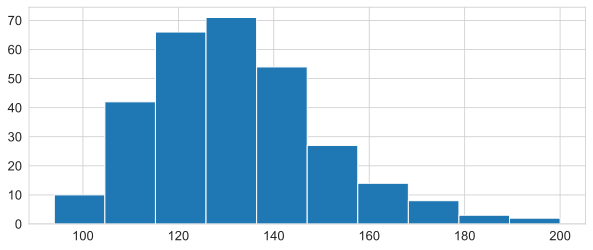

In [134]:
plt.hist(df.trestbps.values)

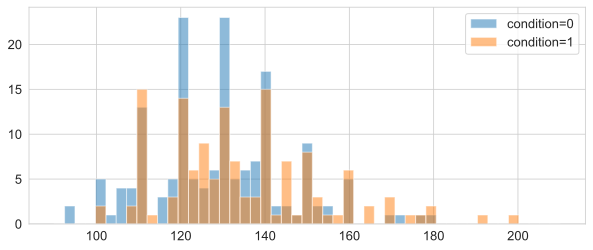

In [135]:
x = list(df[df['condition']==0].trestbps.values)
y = list(df[df['condition']==1].trestbps.values)

bins = numpy.linspace(90, 210, 50)

pyplot.hist(x, bins, alpha=0.5, label='condition=0')
pyplot.hist(y, bins, alpha=0.5, label='condition=1')
pyplot.legend(loc='upper right')
plt.show()

In [136]:
# 0: normal
# 1: ST-T wave abnormality
# 2: Left ventricular hypertrophy by Estes' criteria (probably or definite)

<BarContainer object of 3 artists>

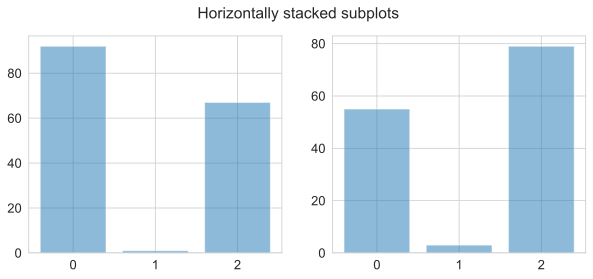

In [137]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.figsize = (15, 4)
fig.suptitle('Horizontally stacked subplots')
ax1.bar(x=df[df['condition']==0].restecg.value_counts().index, height=df[df['condition']==0].restecg.value_counts().values, alpha=0.5, label='condition=0')
ax2.bar(x=df[df['condition']==1].restecg.value_counts().index, height=df[df['condition']==1].restecg.value_counts().values, alpha=0.5, label='condition=0')

In [138]:
df.oldpeak

0     0.10000
1     1.80000
2     2.60000
3     1.40000
4     1.80000
        ...  
292   0.00000
293   1.20000
294   1.60000
295   1.40000
296   0.00000
Name: oldpeak, Length: 297, dtype: float64

(array([144.,  49.,  40.,  24.,  20.,  11.,   6.,   1.,   0.,   2.]),
 array([0.  , 0.62, 1.24, 1.86, 2.48, 3.1 , 3.72, 4.34, 4.96, 5.58, 6.2 ]),
 <BarContainer object of 10 artists>)

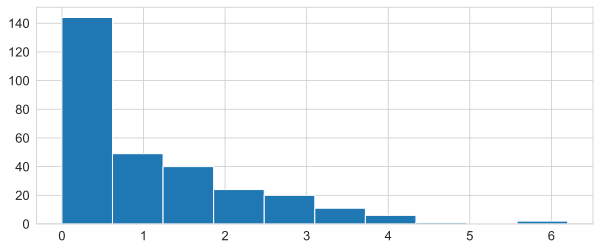

In [154]:
plt.hist(df.oldpeak.values)

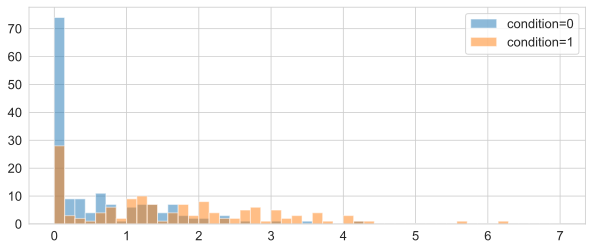

In [140]:
x = list(df[df['condition']==0].oldpeak.values)
y = list(df[df['condition']==1].oldpeak.values)

bins = numpy.linspace(0, 7, 50)

pyplot.hist(x, bins, alpha=0.5, label='condition=0')
pyplot.hist(y, bins, alpha=0.5, label='condition=1')
pyplot.legend(loc='upper right')
plt.show()

(array([ 1.,  9., 32., 38., 35., 59., 63., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

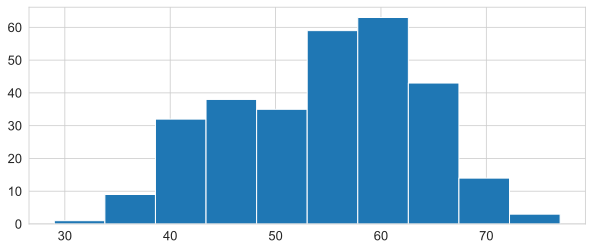

In [141]:
plt.hist(df.age.values)

In [142]:
df[(df['condition']==0) & (df['sex']==0)].age

1      69
2      66
8      60
13     58
23     74
       ..
266    49
272    46
276    45
287    42
295    35
Name: age, Length: 71, dtype: int64

(array([ 3.,  8.,  9.,  6., 11.,  9.,  7., 11.,  5.,  2.]),
 array([34. , 38.2, 42.4, 46.6, 50.8, 55. , 59.2, 63.4, 67.6, 71.8, 76. ]),
 <BarContainer object of 10 artists>)

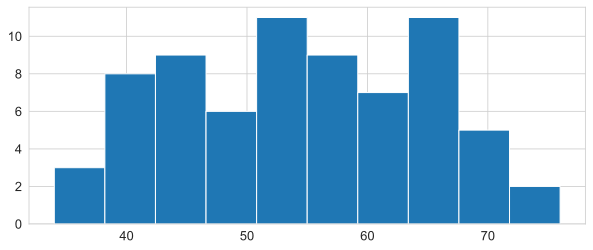

In [143]:
plt.hist(df[(df['condition']==0) & (df['sex']==0)].age.values)

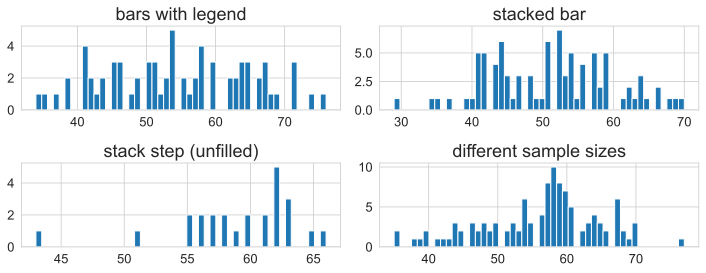

In [144]:
np.random.seed(19680801)

n_bins = 50

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)

ax0.hist(df[(df['condition']==0) & (df['sex']==0)].age.values, n_bins)
# ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(df[(df['condition']==0) & (df['sex']==1)].age.values, n_bins)
ax1.set_title('stacked bar')

ax2.hist(df[(df['condition']==1) & (df['sex']==0)].age.values, n_bins)
ax2.set_title('stack step (unfilled)')

ax3.hist(df[(df['condition']==1) & (df['sex']==1)].age.values, n_bins)
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

(array([ 12.,  70., 102.,  69.,  36.,   3.,   4.,   0.,   0.,   1.]),
 array([126. , 169.8, 213.6, 257.4, 301.2, 345. , 388.8, 432.6, 476.4,
        520.2, 564. ]),
 <BarContainer object of 10 artists>)

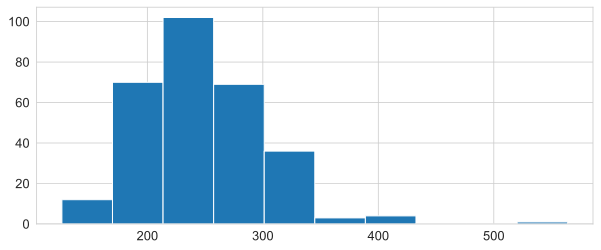

In [147]:
plt.hist(df.chol.values)

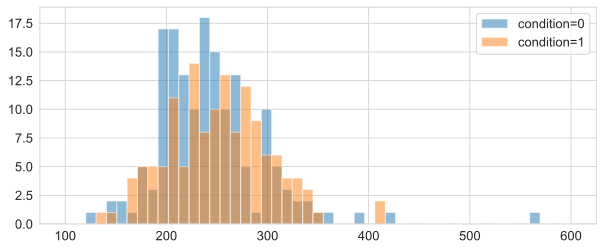

In [149]:
x = list(df[df['condition']==0].chol.values)
y = list(df[df['condition']==1].chol.values)

bins = numpy.linspace(100, 600, 50)

pyplot.hist(x, bins, alpha=0.5, label='condition=0')
pyplot.hist(y, bins, alpha=0.5, label='condition=1')
pyplot.legend(loc='upper right')
plt.show()

In [157]:
len(df.columns)

14